# 12 - Processamento de Linguagem Natural

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Exemplo Aula Anterior
- 2) Exercícios Aula Anterior
- 3) Transformações dos Textos e Modelagem
- 4) Word Embedding
- 5) Exercícios

<img src="https://i1.wp.com/thedatascientist.com/wp-content/uploads/2018/09/data_science_wordcloud.png?fit=1584%2C1008&ssl=1" width=800>

##   

## Exemplo - Aula Anterior

Vamos agora já começar a práticar com os nossos dados de exemplo:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import SnowballStemmer
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandro.saorin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandro.saorin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\sandro.saorin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


In [8]:
movies = pd.read_csv('./datasets/movies.csv', index_col=0)

Nosso exemplo será uma Análise de Sentimento em Críticas de Filmes, onde vamos identificar se a crítica foi boa ou não:

In [9]:
movies.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [11]:
movies['label'].value_counts()

0    25000
1    25000
Name: label, dtype: int64

A nossa base de dados tem 50 mil linhas e levando em consideração que as críticas são sobre filmes diversos, a quantidade de palavras disponíveis nos textos será muito grande. Para economizar tempo de aula com processamneto dos textos e modelagem, iremos criar uma amostra com 10% da base:

In [12]:
movies_sample = movies.sample(frac=0.1, replace=False)

In [13]:
movies.shape

(50000, 2)

In [14]:
movies_sample.shape

(5000, 2)

Definindo o pipeline de preprocessamento dos textos:

In [17]:
stopwords = set(stopwords.words('english'))

stemmer = PorterStemmer()

# Pipeline - Text Preprocessing
def preprocessing(string):
    ###
    # Remove links with http/https
#     string = re.sub(r'http\S+', '', string, flags=re.MULTILINE)
#     ###
#     # Remove hashtags
#     string = re.sub(r'#(\w+)', '', string, flags=re.MULTILINE)
#     ###
#     # Remove mentions
#     string = re.sub(r'@(\w+)', '', string, flags=re.MULTILINE)
    ###
    # Remove Numbers
    string = re.sub(r'\d', '', string)
    ###
    # Remove Special Characters
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # Lowercase words
    string = string.lower()
    ###
    # Word Tokenize
    words = word_tokenize(string)
    ###
    # Remove Stopwords
    filtered_words = []
    for w in words:
        if w not in stopwords:
            filtered_words.append(w)
    ###
    # Stemming Words
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)
    ###
    return stem_words

Agora iremos aplicar o nosso processamento dos textos:

In [18]:
movies_sample["filtered_words"] = movies_sample['text'].apply(lambda x: preprocessing(x))

# Normalmente depois do processamento juntamos as palavras novamente em uma só string

movies_sample['join_words'] = movies_sample['filtered_words'].apply(lambda x: ' '.join(x))

In [19]:
movies_sample.head()

,text,label,filtered_words,join_words
2153,Ingrid Bergman is a temporarily impoverished P...,1,"[ingrid, bergman, temporarili, impoverish, pol...",ingrid bergman temporarili impoverish polish c...
11922,"I've Seen The Beginning Of The Muppet Movie, B...",1,"[seen, begin, muppet, movi, half, watch, mr, k...",seen begin muppet movi half watch mr kelli fri...
9846,"""Female Convict Scorpion - Beast Stable"", the ...",1,"[femal, convict, scorpion, beast, stabl, third...",femal convict scorpion beast stabl third seri ...
39097,Talk about over acting...!!!! not just by Govi...,0,"[talk, act, govinda, also, salman, lara, direc...",talk act govinda also salman lara direct aw fi...
16608,Joe Rogan's whole act is profanity laced with ...,0,"[joe, rogan, whole, act, profan, lace, bile, p...",joe rogan whole act profan lace bile pot smoke...


##   

## Exercícios da última aula

Desenvolvimento dos exercícios em um notebook a parte.

## 

## Corpus

É importante ressaltar que a escolha das etapas de pré-processamento não é algo óbvio, dado que há muitas escolhas possíveis acerca do que se fazer para pré-processar os dados. Assim, o indicado é treinar diferentes modelos testando diferentes combinações das técnicas de pré-processamento, até que o melhor procedimento seja encontrado!

**Nomenclatura**: o conjunto de mensagens pré-processadas é chamado de **Corpus**.

## Vocabulário

O vocabulário do corpus nada mais é do que uma listagem das palavras individuais que aparecem no corpus. Para encontrar o vocabulário, basta contarmos a aparição de cada palavra isolada no corpus. Ao fim, teremos N palavras únicas que compõem nosso vocabulário.

##  

## Bag of Words

**Bag of Words** é o processo onde traduzimos o texto já tratado para uma representação numérica que faça sentido para o modelo de *Machine Learning* consiga interpretá-lo.

As transformações mais comuns em NLP são **CountVectorizer** e **TF-IDF**

##  

## CountVectorizer 

Após estudarmos o vocabulário, vamos efetivamente montar o modelo de bag-of-words. Este modelo funciona da seguinte forma:

- Pegue uma frase do corpus;
- Crie um vetor N-dimensional de inteiros (onde N é o número de palavras do vocabulário);
- Cada componente do vetor corresponde a uma palavra do vocabulário, segundo a ordem que as palavras aparecem no vocabulário.
- Preencha esse vetor com zeros (todas suas componentes serão 0);
- Para cada palavra da frase, mude a componente correspondente do vetor para 1;
- Faça isso para todas as frases do corpus;

Ao fim do processo acima para todas as frases do corpus (supomos que sejam M frases), nós empilhamos os respectivos vetores, de modo que teremos uma matriz de M linhas e N colunas. E essa matriz é o modelo final de bag-of-words, que por ser uma matriz numérica, pode ser facilmente usada como input pros modelos de machine learning!

Pra exemplificar o procedimento, vamos a um exemplo: suponha que nossa base de treino contenha as seguintes 3 frases **(M = 3)**:

["Yay can't wait to party together!",<br>
 'You got called a tool?',<br>
 'Still chance there. If you search hard you will get it..let have a try :)']

Após o pre-processamento inicial das frases, o corpus final fica sendo:

['yay cant wait party together',<br>
 'get call tool',<br>
 'still chance search hard get itlet try']

Olhando pro corpus, é fácil ver que nosso vocabulário é:

['wait',
 'itlet',
 'get',
 'still',
 'search',
 'call',
 'yay',
 'cant',
 'together',
 'tool',
 'hard',
 'try',
 'chance',
 'party']

É útil deixarmos o vocabulário em ordem alfabética:

['call',
 'cant',
 'chance',
 'get',
 'hard',
 'itlet',
 'party',
 'search',
 'still',
 'together',
 'tool',
 'try',
 'wait',
 'yay']
 
Temos **N = 14** palavras no vocabulário. 

O one-hot encoding de cada uma das frases do corpus irá, então, produzir um **vetor 14-dimensional** de 1 e 0, com 1 nas posições respectivas às palavras no vocabulário. Vamos entender:

Para a frase "yay cant wait party together", teremos um vetor com o numero 1 nas posições 13, 1, 12, 6, e 9 (respectivamente as posições de "yay", "cant", "wait", "party" e "together"), de forma que temos o vetor:

> "yay cant wait party together"" --> [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

Analogamente, para as outras duas frases, teremos os vetores:

> "get call tool" --> [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

> "still chance search hard get itlet try" --> [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]


Finalmente, o modelo de bag-of-words (BoW) final é a **matriz de dimensão 3 x 14 (M = 3 frases no corpus, N = 14 palavras no vocabulário)**, obtida ao empilhar os vetores:
  
$ BoW = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix} $

Esse é o processo conhecido por [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

Naturalmente, tanto nosso corpus quanto nosso vocabulário serão muito maiores que os desse exemplo simples. Mas, o procedimento é exatamente o mesmo, e no final, teremos exatamente o mesmo output do modelo de bag-of-words: uma matriz M x N de 0 e 1, prontinha pra ser input dos modelos de machine learning!

Vamos definir primeiro X e y:

In [20]:
X = movies_sample['join_words']
y = movies_sample['label']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = 42)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer()

In [24]:
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

In [25]:
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Vamos fazer uma função para testar diversos tipos de modelos:

In [26]:
random_seed = 42

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

list_models = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_models_plot_roc_auc_curve(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl[col_model_name], auc))
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("ROC - AUC  : %0.4f " % auc)
        print("======================")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\sandro.saorin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model      : Logistic Regression
Accuracy   : 0.8420 
Precision  : 0.8424 
Recall     : 0.8420 
F1 - Score : 0.8420 
ROC - AUC  : 0.8422 
Model      : Decision Tree
Accuracy   : 0.7093 
Precision  : 0.7094 
Recall     : 0.7093 
F1 - Score : 0.7091 
ROC - AUC  : 0.7089 
Model      : Random Forest
Accuracy   : 0.8420 
Precision  : 0.8420 
Recall     : 0.8420 
F1 - Score : 0.8420 
ROC - AUC  : 0.8419 
Model      : AdaBoost
Accuracy   : 0.7960 
Precision  : 0.7966 
Recall     : 0.7960 
F1 - Score : 0.7960 
ROC - AUC  : 0.7963 


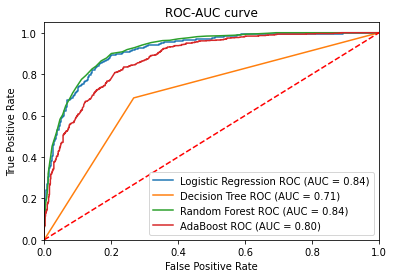

In [28]:

test_models_plot_roc_auc_curve(list_models,
                               "model_name",
                               "estimator",
                               X_train_cv,
                               X_test_cv,
                               y_train,
                               y_test)

##  

## TF-IDF

**Term Frequency and Inverse Document Frequency** é uma tranformação muito conhecida, onde avaliamos a relevância das palavras pelo **Frequência dos Termos** multiplicado pelo **Inverso da Frequência nos Documentos**, onde **documento** é cada um dos textos dentro de um Dataset. Vamos entender cada um dos termos:

> **TF - Term Frequency**: é a frequência de vezes que um termo/palavra aparece em cada um dos documentos analisados (isso nos ajuda a avaliar a relevância daquela palavra);

> **IDF - Inverse Document Frequency**: aqui avaliamos em quantos documentos o termo/palavra aparece (dessa forma conseguimos entender a sua influência em identificar os textos);

O TF acredito que seja bem claro o entendimento, mas o IDF pode ser um pouco confuso, então vamos explicar da seguinte forma:
<br><br>
Imagina que temos diversos textos (documents) sobre esportes e queremos classificar os textos de acordo com os esportes tratados (futebol, basquete e etc). Se uma palavra aparecer em todos os textos qual a relevância dela na identificação do texto? Mínima (Por exemplo a palavra esporte em textos que só falam sobre esporte).
<br><br>
Por outro lado, se a palavra esgrima aparece em apenas um dos documentos (ou poucos deles), ela vai ser importante para a identificação daquele texto!
<br><br>
Resumindo o conceito de TF-IDF em diagrama, temos que:

<img src="https://www.researchgate.net/profile/Haider-Al-Khateeb/publication/291950178/figure/fig1/AS:330186932408324@1455734107458/Term-Frequency-Inverse-Document-Frequency-TF-IDF.png" width=800>

Vamos aplicá-lo na prática:

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(use_idf = True)

In [30]:
X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()

In [31]:
X_train_tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Model      : Logistic Regression
Accuracy   : 0.8607 
Precision  : 0.8615 
Recall     : 0.8607 
F1 - Score : 0.8607 
ROC - AUC  : 0.8610 
Model      : Decision Tree
Accuracy   : 0.7173 
Precision  : 0.7176 
Recall     : 0.7173 
F1 - Score : 0.7173 
ROC - AUC  : 0.7175 
Model      : Random Forest
Accuracy   : 0.8440 
Precision  : 0.8440 
Recall     : 0.8440 
F1 - Score : 0.8440 
ROC - AUC  : 0.8439 
Model      : AdaBoost
Accuracy   : 0.8000 
Precision  : 0.8004 
Recall     : 0.8000 
F1 - Score : 0.8000 
ROC - AUC  : 0.8002 


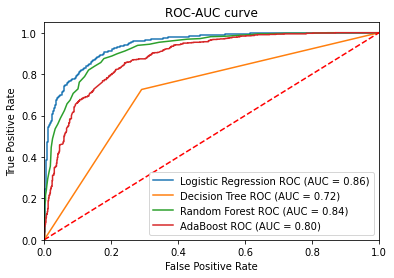

In [32]:
test_models_plot_roc_auc_curve(list_models,
                               "model_name",
                               "estimator",
                               X_train_tfidf,
                               X_test_tfidf,
                               y_train,
                               y_test)

##  

# Word Embedding

O __word Embedding__ é uma técnica bem interessante e mais avançada em NLP, consiste em não só utlizar as frequências das palavras como visto no __CountVectorizer__ e __TF-IDF__, mas nesse caso leva em consideração todo o contexto do texto analisado, montando uma mapa de características de determinada palavra que podemos representar como um vetor (multidimensional).<br>
<br>
Existem diversos modelos de __Word Embedding__, onde daremos uma atenção especial para o __Word2Vec__.

<br><br>
## Word2Vec

O __word2Vec__ é uma arquitetura de _Word Embeddings_ que utliza duas arquiteturas de redes neurais para fazer a transformação entre as palavras e contexto em um vetor de características (Não se preocupem ainda não vamos entrar na questão da rede neural em si).As arquiteturas que compôe o __Word2Vec__ são:

- __CBOW__ (__Continuous Bag of Words__): Consiste de um modelo tenta predizer a palavra alvo (ou palavra central) a partir de palavras vizinhas (ou também chamado de palavras de contexto) dentro de uma janela de quantas palavras de contexto serão utilizadas. Por exemplo:

In [33]:
# Imagine a frase a seguir
print("Hoje vai fazer sol pela manhã com pancadas de chuva a tarde\n")

# Para uma janela de 2 palavras de contexto e seguindo a notação ([palavras de contexto], palavra alvo), temos que:
print("Predições a partir das palavras de contexto - janela = 2 palavras:")
print("([Hoje, fazer], vai)")
print("([vai, sol], fazer)")
print("([fazer, pela], sol)")
print("([sol, manhã], pela)")
print("([pela, com], manhã)")
print("([manhã, pancadas], com)")
print("([com, de], pancadas)")
print("([pancadas, chuva], de)")
print("([de, a], chuva)")
print("([chuva, tarde], a)")

Hoje vai fazer sol pela manhã com pancadas de chuva a tarde

Predições a partir das palavras de contexto - janela = 2 palavras:
([Hoje, fazer], vai)
([vai, sol], fazer)
([fazer, pela], sol)
([sol, manhã], pela)
([pela, com], manhã)
([manhã, pancadas], com)
([com, de], pancadas)
([pancadas, chuva], de)
([de, a], chuva)
([chuva, tarde], a)


- __Skip-Gram__: Seria o processo inverso ao _CBOW_, onde a partir da palavra alvo, o modelo tanta predizer as palavras de contexto (vizinhas). Exemplo:

In [34]:
# Para uma janela de 2 palavras de contexto e seguindo a notação ([palavras de contexto], palavra alvo), temos que:
print("Predições a partir das palavra alvo:")
print("(vai, [Hoje, fazer])")
print("(fazer, [vai, sol])")
print("(sol, [fazer, pela])")
print("(pela, [sol, manhã])")
print("(manhã, [pela, com])")
print("(com, [manhã, pancadas])")
print("(pancadas, [com, de])")
print("(de, [pancadas, chuva])")
print("(chuva, [de, a])")
print("(a, [chuva, tarde])")

Predições a partir das palavra alvo:
(vai, [Hoje, fazer])
(fazer, [vai, sol])
(sol, [fazer, pela])
(pela, [sol, manhã])
(manhã, [pela, com])
(com, [manhã, pancadas])
(pancadas, [com, de])
(de, [pancadas, chuva])
(chuva, [de, a])
(a, [chuva, tarde])


Então a partir da combinação dessas duas arquiteturas que o modelo consegue montar o vetor de características para cada uma das palavras e conseguimos fazer algumas aplicações por similaridade.

In [4]:
# instalando o gensim
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [35]:
from gensim.models import Word2Vec

In [36]:
movies_sample2 = movies.sample(frac=0.002, replace=False)

In [37]:
movies_sample2.shape

(100, 2)

Agora iremos aplicar o nosso processamento dos textos:

In [38]:
movies_sample2["filtered_words"] = movies_sample2['text'].apply(lambda x: preprocessing(x))

# Normalmente depois do processamento juntamos as palavras novamente em uma só string

movies_sample2['join_words'] = movies_sample2['filtered_words'].apply(lambda x: ' '.join(x))

In [39]:
movies_sample2.head()

,text,label,filtered_words,join_words
2466,Arthur Askey's great skill as a comic was in t...,0,"[arthur, askey, great, skill, comic, way, comm...",arthur askey great skill comic way commun publ...
20487,Another in the they don't make em like that ca...,1,"[anoth, make, em, like, categori, stori, famil...",anoth make em like categori stori famili real ...
33236,"I think that my favorite part of this movie, t...",0,"[think, favorit, part, movi, one, exemplifi, s...",think favorit part movi one exemplifi sheer po...
13608,If it wasn't for the performances of Barry Dia...,0,"[perform, barri, diamond, art, evan, clueless,...",perform barri diamond art evan clueless stoner...
25402,Disregard the plot and enjoy Fred Astaire doin...,1,"[disregard, plot, enjoy, fred, astair, foggi, ...",disregard plot enjoy fred astair foggi day sev...


In [46]:
movies_sample['filtered_words'][:10].array

<PandasArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [68]:
sentences = movies_sample['filtered_words'][:3].array

In [69]:
model = Word2Vec(sentences, min_count=1)

In [70]:
print(model)

Word2Vec(vocab=225, vector_size=100, alpha=0.025)


In [71]:
# Sumarizando o Vocabulario
words = list(model.wv.index_to_key)
words

['scorpion',
 'movi',
 'br',
 'film',
 'muppet',
 'end',
 'seen',
 'first',
 'matter',
 'one',
 'villain',
 'rule',
 'arm',
 'charact',
 'photograph',
 'anoth',
 'begin',
 'kermit',
 'gener',
 'best',
 'hilari',
 'scene',
 'gypsi',
 'thick',
 'french',
 'non',
 'confus',
 'result',
 'trailer',
 'toward',
 'fast',
 'littl',
 'anyon',
 'happen',
 'speaker',
 'appear',
 'rainbow',
 'thing',
 'less',
 'capo',
 'song',
 'believ',
 'hous',
 'includ',
 'friend',
 'kelli',
 'mr',
 'watch',
 'small',
 'half',
 'green',
 'put',
 'heck',
 'masterpiec',
 'renoir',
 'human',
 'make',
 'learn',
 'men',
 'elena',
 'deepli',
 'enough',
 'gamekeep',
 'machin',
 'backroom',
 'histori',
 'plot',
 'deliri',
 'entrain',
 'premis',
 'failproof',
 'magnat',
 'shoe',
 'engag',
 'top',
 'count',
 'glamor',
 'popular',
 'franc',
 'pursu',
 'find',
 'pari',
 'countess',
 'polish',
 'impoverish',
 'temporarili',
 'bergman',
 'polit',
 'handler',
 'jealou',
 'down',
 'modot',
 'favorit',
 'even',
 'redux',
 'game'

In [73]:
print(model.wv.most_similar('closer'))

[('surreal', 0.2657181918621063), ('thing', 0.24859844148159027), ('gamekeep', 0.23208896815776825), ('touch', 0.22617430984973907), ('nihilist', 0.22449493408203125), ('non', 0.20516452193260193), ('seen', 0.1916402280330658), ('mel', 0.1897554099559784), ('put', 0.1837090104818344), ('learn', 0.18066935241222382)]


In [74]:
X = model.wv[words]

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components = 2, random_state = 42)
result = pca.fit_transform(X)

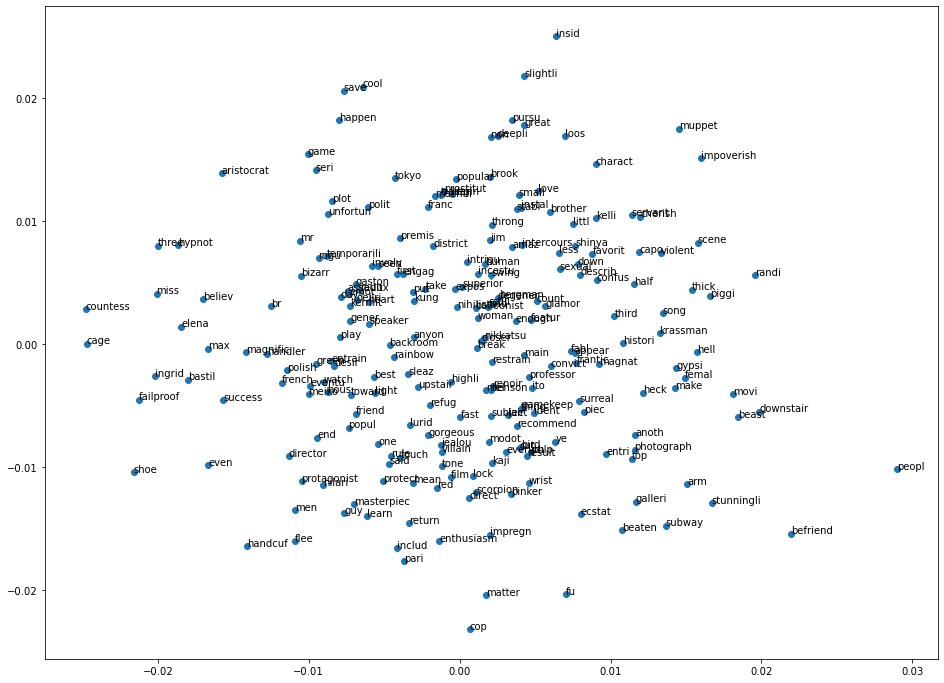

In [78]:
plt.figure(figsize=(16, 12))

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()

## 

### Quantas componentes precisamos do PCA para ter um nível de confiança dos dados?

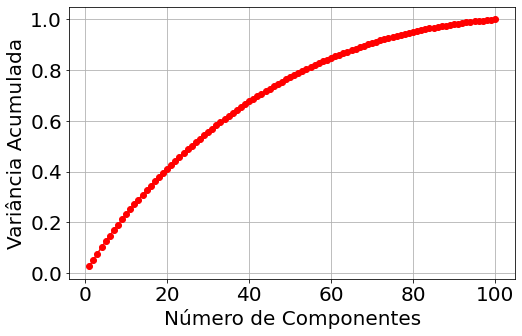

In [81]:
# Pca sem setar a quantidade de componentes
pca = PCA().fit(X)

# plot da curva
plt.figure(figsize=(8,5))

# numero de componentes
ncomp = np.arange(1, np.shape(X)[1]+1)

# Plot
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Número de Componentes', fontsize=20)
plt.ylabel('Variância Acumulada', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid()
plt.show()

## 

## Exercícios

**1)** Utilizando os dados de tweets vamos avaliar com modelos de Machine Learning se os tweets são de desastres ou não. Essa base é um dataset conhecido do Kaggle, onde vocês podem ter mais detalhes [clicando aqui](https://www.kaggle.com/c/nlp-getting-started/overview).